## 4.6 Summary

To summarize what we learned in this and the last chapter, we will now produce a plot with four subplots for the seasonal temperature averages over the african continent in a PlateCarree Projection in the form of a contourf plot. 

We start with selecting africa, grouping by month and averaging over the seasons:

In [45]:
africa = ds.t2m.sel(latitude = slice(45, -40), longitude = slice(-20,60))
temp_month=africa.groupby('time.month').mean(dim='time')-273.15
temp_djf=temp_month.sel(month=[1, 2, 12]).mean(dim='month')
temp_mam=temp_month.sel(month=[3, 4, 5]).mean(dim='month')
temp_jja=temp_month.sel(month=[6, 7, 8]).mean(dim='month')
temp_son=temp_month.sel(month=[9, 10, 11]).mean(dim='month')


Now produce the plot:

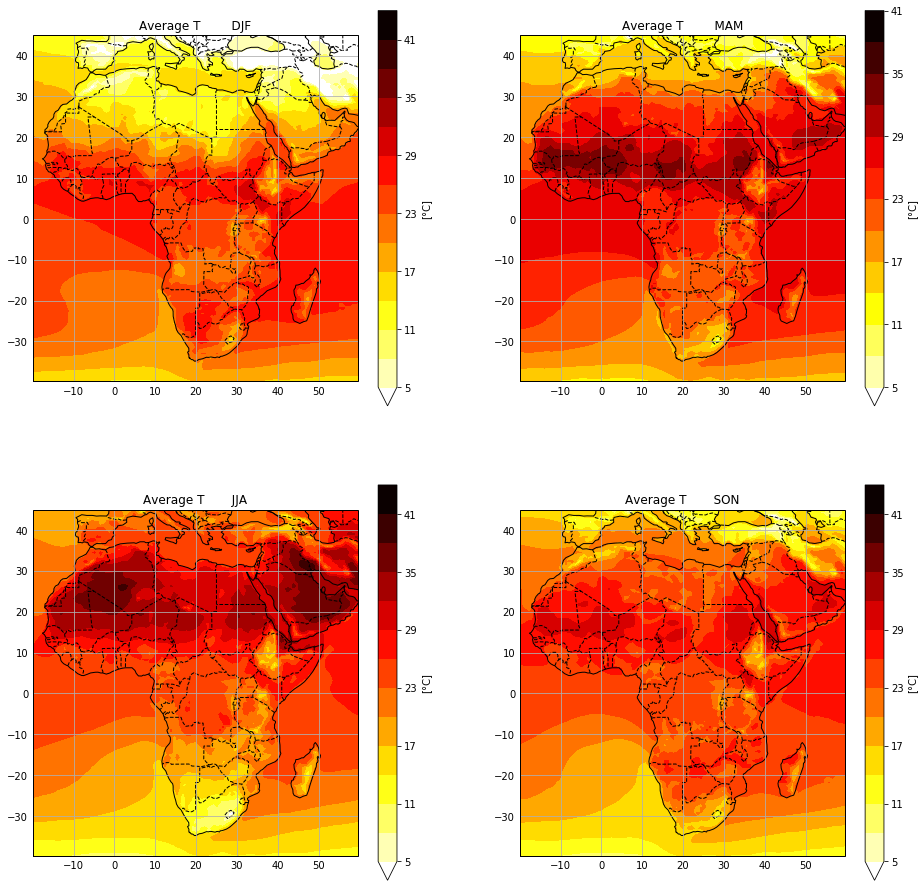

In [46]:
figur = plt.figure(figsize=(16, 16)) #define a figure of a certain size
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree()) #first subplot
temp_djf.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=np.arange(5, 45, 3), cmap='hot_r', cbar_kwargs={'label':'[°C]'})
# the actual plot with levels, a colormap and a labeled colorbar
ax.coastlines(); #add coastlines
xl = ax.gridlines(draw_labels=True); #add gridlines with labels
xl.xlabels_top = False # no labels at the top
xl.ylabels_right = False # no labels on the right side
ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # add dashed country borders
ax.set_title('Average T        DJF'); # add a title

ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
temp_mam.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=np.arange(5, 43, 3), cmap='hot_r', cbar_kwargs={'label':'[°C]'})
ax.coastlines();
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
ax.set_title('Average T        MAM');

ax = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
temp_jja.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=np.arange(5, 45, 3), cmap='hot_r', cbar_kwargs={'label':'[°C]'})
ax.coastlines();
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
ax.set_title('Average T       JJA');
                   
ax = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
temp_son.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=np.arange(5, 45, 3), cmap='hot_r', cbar_kwargs={'label':'[°C]'})
ax.coastlines();
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
ax.set_title('Average T       SON');